## Author : Mahesh Kadam
## Task 2 Nov-21 Batch, Data Science& Business Analytics Tasks, GRIP @ The Sparks Foundation
## Unsupervised model clustering IRIS Dataset
## KMean Clustering

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## All the features shld be in same scale so i used standard scaler here before model building
## KMean Clustering Assumption: All features should be on same scale

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
features = scaler.fit_transform(df)

In [18]:
features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [19]:
from sklearn.cluster import KMeans

##  to define K value Elbow method first elbow with minimum WGSS

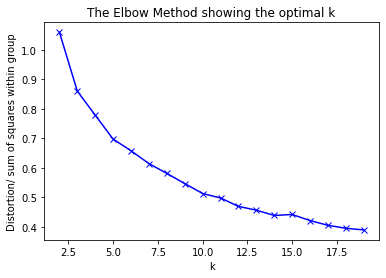

In [20]:
from scipy.spatial.distance import cdist
distortions = []
k = range(2,20)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(features)
    distortions.append(sum(np.min(cdist(features, model.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])

# Plot the elbow
plt.plot(k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion/ sum of squares within group')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## we observed first elbow after 2.5 so consider K=3

In [21]:
k=3
cluster = KMeans(n_clusters=k, random_state=10, n_jobs = -1 )
model = cluster.fit(features)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [22]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [23]:
model.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

In [24]:
new_observation = [[1.2, 0.3, 0.8, 1.1]]
model.predict(new_observation)

array([1])

In [25]:
labels = model.labels_
centroids = model.cluster_centers_
#centroids

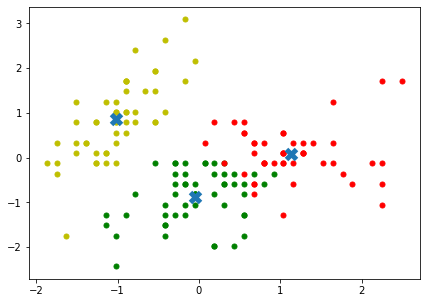

In [124]:
colors = ["g.","r.","y."]
x_axis = 0
y_axis = 1
plt.figure(figsize=(7,5))
for i in range(features.shape[0]):
    plt.plot(features[i][x_axis], features[i][y_axis], colors[labels[i]], markersize = 10)
    
plt.scatter(centroids[:, x_axis],centroids[:, y_axis], marker = "x", s=100, linewidths = 5, zorder = 10,label='Centroid')


plt.show()

In [125]:
from sklearn.metrics import silhouette_score

In [127]:
#Evaluate Model: When labels are not available 
silhouette_score(features, labels)

0.45994823920518635

## here Score is aprox 0.5 average. Best score = 1

## another model MeanShift
## doesn't assume anything about clusdter shape
## no need to set value of K

In [172]:
from sklearn.cluster import MeanShift

In [181]:
cluster_ms = MeanShift(cluster_all =False, n_jobs = -1)
model_ms = cluster_ms.fit(features)

In [182]:
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_

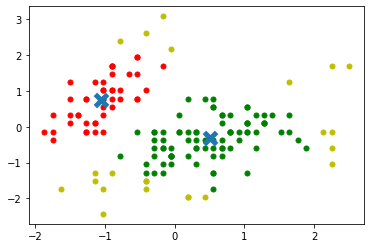

In [183]:
for i in range(features.shape[0]):
    plt.plot(features[i][x_axis], features[i][y_axis], colors[labels_ms[i]], markersize = 10)


plt.scatter(centroids_ms[:, x_axis],centroids_ms[:, y_axis], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

In [184]:
silhouette_score(features, labels_ms)

0.44568691254236625

## Not much difference seen here 0.5 average score obtained.